In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds

In [20]:
data = BinaryIV.generate_data_rolling_ate(N_simulations=100)
data

,seed,intercept_X,intercept_Y,b_Z_X,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,sigma_X,sigma_Y
0,234745,0,0,0.769146,-0.272214,-5.0,0.493068,-0.538085,0.003650,0.008313,0.546398,0.353251,0.480982,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ...","[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",0.999711,0.960818,0.976500,0.760168,0.387529,1.952470
1,613388,0,0,-1.931119,1.255495,-4.9,1.614808,-0.743026,0.005575,0.030918,0.773944,0.819924,0.989174,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, ...","[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, ...",0.106274,0.680077,0.847146,0.997043,0.490377,0.599364
2,106798,0,0,1.115909,1.730048,-4.8,-0.828364,-0.334101,0.002772,0.004388,0.338489,0.820204,0.836622,"[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.643794,0.671248,0.529361,0.365924,0.386684,0.950256
3,601735,0,0,-0.356493,0.825998,-4.7,-1.452521,-0.208735,0.001916,0.002606,0.211341,0.945885,0.564351,"[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.989588,0.365924,0.981454,0.475304,1.715146,0.240815
4,611306,0,0,-0.536689,0.554381,-4.6,-0.473709,-0.398674,0.004048,0.006922,0.405596,0.822036,0.334673,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...","[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.947551,0.697269,0.990932,0.752796,0.371216,1.211753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,288286,0,0,1.215355,-1.148921,4.5,-1.146365,0.572105,0.578532,0.980991,0.408886,0.359609,0.049880,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...",0.214071,0.935842,0.979544,0.902193,0.183899,0.853356
96,787931,0,0,-2.083315,0.242720,4.6,0.443027,0.447661,0.452206,0.991471,0.543810,0.372653,0.926288,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, ...",0.335334,0.972109,0.653109,0.962170,0.479443,0.335282
97,997180,0,0,-1.512407,-0.339305,4.7,-0.018083,0.491684,0.496197,0.990961,0.499277,0.189989,0.030934,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...",0.204325,0.634310,0.997402,0.829749,0.268082,1.484589
98,619322,0,0,0.653739,0.392875,4.8,-0.788242,0.630550,0.635782,0.984336,0.353786,0.790086,0.543239,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.990272,0.760168,0.926720,0.811278,0.644846,0.181661


In [ ]:
binaryIV = BinaryIV('IV Dag', data)

algorithms = [alg for alg in binaryIV.get_algorithms('PNS') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run_all_bounding_algorithms(algorithms)

Running ATE_2SLS-0.99...
ATE_2SLS-0.99 completed in 1.36 seconds.
Running ATE_2SLS-0.98...
ATE_2SLS-0.98 completed in 1.27 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 29.86 seconds.
Running ATE_autobound...
Error in AutoBound: Model constraint (c0) contains nonlinear terms that cannot be written to LP format
ATE_autobound completed in 28.28 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 6.94 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 9.33 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 7.76 seconds.
Running ATE_nonpara...
ATE_nonpara completed in 0.04 seconds.
Total runtime: 84.84 seconds.


             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width
ATE_entropybounds-0.10          0.00             4.00          0.6023
       ATE_causaloptim          1.00             4.04          0.7555
ATE_entropybounds-0.20          0.00             2.00          0.7859
         ATE_autobound          1.00             1.01          0.7942
ATE_entropybounds-0.80          0.00             1.00          0.9957
         ATE_2SLS-0.98          1.00             1.01          1.2231
         ATE_2SLS-0.99          1.00             1.01          1.2934
           ATE_nonpara          0.00             0.00          1.6751
    ATE_zaffalonbounds           N/A              N/A             N/A


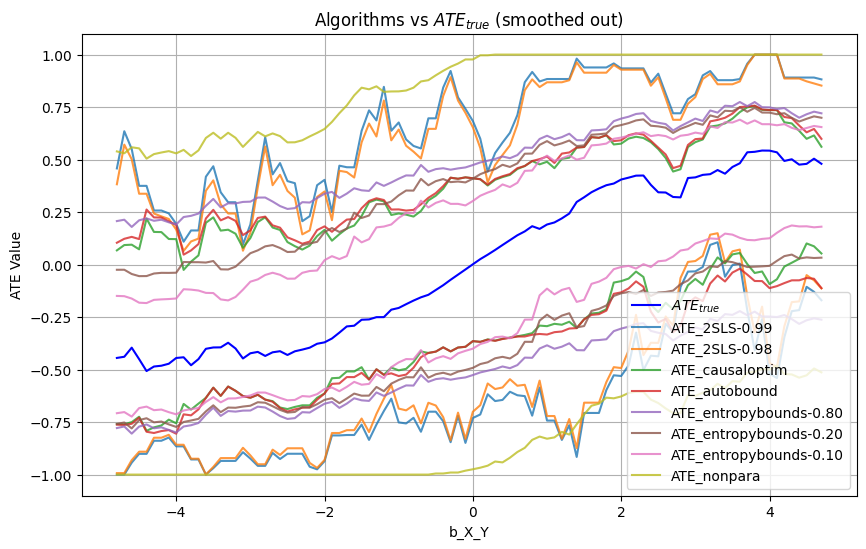

In [26]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('ATE')
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(binaryIV.data, ate_algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'ATE', ate_algs, 5, False)

In [12]:
invalids = binaryIV.data[binaryIV.data['causaloptim_bound_valid'] == False]
invalIV = BinaryIV('IV Dag', invalids)
invalIV.bound_ate_causaloptim()
invalIV.data

KeyError: 'causaloptim_bound_valid'

In [7]:
binaryIV.data

,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,ATE_2SLS_0.99_bound_lower,ATE_2SLS_0.99_bound_upper,ATE_2SLS_0.99_bound_valid,ATE_2SLS_0.99_bound_width,ATE_2SLS_0.99_bound_failed,ATE_2SLS_0.98_bound_lower,ATE_2SLS_0.98_bound_upper,ATE_2SLS_0.98_bound_valid,ATE_2SLS_0.98_bound_width,ATE_2SLS_0.98_bound_failed,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,PNS_causaloptim_bound_lower,PNS_causaloptim_bound_upper,PNS_causaloptim_bound_valid,PNS_causaloptim_bound_width,PNS_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,PNS_autobound_bound_lower,PNS_autobound_bound_upper,PNS_autobound_bound_valid,PNS_autobound_bound_width,PNS_autobound_bound_failed,ATE_entropybounds_0.80_bound_lower,ATE_entropybounds_0.80_bound_upper,ATE_entropybounds_0.80_bound_valid,ATE_entropybounds_0.80_bound_width,ATE_entropybounds_0.80_bound_failed,ATE_entropybounds_0.20_bound_lower,ATE_entropybounds_0.20_bound_upper,ATE_entropybounds_0.20_bound_valid,ATE_entropybounds_0.20_bound_width,ATE_entropybounds_0.20_bound_failed,ATE_entropybounds_0.10_bound_lower,ATE_entropybounds_0.10_bound_upper,ATE_entropybounds_0.10_bound_valid,ATE_entropybounds_0.10_bound_width,ATE_entropybounds_0.10_bound_failed,PNS_entropybounds_0.80_bound_lower,PNS_entropybounds_0.80_bound_upper,PNS_entropybounds_0.80_bound_valid,PNS_entropybounds_0.80_bound_width,PNS_entropybounds_0.80_bound_failed,PNS_entropybounds_0.20_bound_lower,PNS_entropybounds_0.20_bound_upper,PNS_entropybounds_0.20_bound_valid,PNS_entropybounds_0.20_bound_width,PNS_entropybounds_0.20_bound_failed,PNS_entropybounds_0.10_bound_lower,PNS_entropybounds_0.10_bound_upper,PNS_entropybounds_0.10_bound_valid,PNS_entropybounds_0.10_bound_width,PNS_entropybounds_0.10_bound_failed,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,PNS_zaffalonbounds_bound_lower,PNS_zaffalonbounds_bound_upper,PNS_zaffalonbounds_bound_valid,PNS_zaffalonbounds_bound_width,PNS_zaffalonbounds_bound_failed,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_manski_bound_valid,PNS_manski_bound_lower,PNS_manski_bound_upper,PNS_manski_bound_width,PNS_manski_bound_failed,PNS_manski_bound_valid
0,866034,0,0,-0.262467,-1.262984,-5.0,0.825349,-0.655176,0.004444,0.014015,0.669191,0.861371,0.742232,"[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, ...","[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, ...",0.835666,0.568307,0.733767,0.988149,-1.000000,0.455757,True,1.455757,False,-1.000000,0.322277,True,1.322277,False,-0.762943,0.147692,True,0.910635,False,0.000000,0.225564,True,0.225564,False,-0.762943,0.156461,True,0.919403,False,-0.0,0.225564,True,0.225564,False,-0.601000,0.399001,False,1.000001,False,-0.601000,0.064899,False,0.665899,False,-0.584047,-0.128591,False,0.455456,False,0.0,0.437997,True,0.437997,False,3.540999e-07,0.405555,True,0.405555,False,0.000000e+00,0.326344,True,0.326344,False,-0.7028,0.1037,True,0.8065,False,0.000,0.2338,True,0.2338,False,-0.980583,-0.415617,0.564965,False,True,0.000000,0.009709,0.009709,False,True
1,888429,0,0,1.382871,-2.245376,0.0,0.066512,0.000000,0.249788,0.512732,0.512732,0.745821,0.706355,"[1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...","[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...","[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, ...",0.868721,0.784919,0.959442,0.998846,-0.163517,0.581715,True,0.745232,False,-0.127428,0.545625,True,0.673053,False,-0.258766,0.397475,True,0.656241,False,0.155027,0.503448,True,0.348422,Fa

In [ ]:
df = pd.read_pickle('results_20250516_133621.pkl')

,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,ATE_2SLS_0.99_bound_lower,ATE_2SLS_0.99_bound_upper,ATE_2SLS_0.99_bound_valid,ATE_2SLS_0.99_bound_width,ATE_2SLS_0.99_bound_failed,ATE_2SLS_0.98_bound_lower,ATE_2SLS_0.98_bound_upper,ATE_2SLS_0.98_bound_valid,ATE_2SLS_0.98_bound_width,ATE_2SLS_0.98_bound_failed,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,PNS_causaloptim_bound_lower,PNS_causaloptim_bound_upper,PNS_causaloptim_bound_valid,PNS_causaloptim_bound_width,PNS_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,PNS_autobound_bound_lower,PNS_autobound_bound_upper,PNS_autobound_bound_valid,PNS_autobound_bound_width,PNS_autobound_bound_failed,ATE_entropybounds_0.80_bound_lower,ATE_entropybounds_0.80_bound_upper,ATE_entropybounds_0.80_bound_valid,ATE_entropybounds_0.80_bound_width,ATE_entropybounds_0.80_bound_failed,ATE_entropybounds_0.20_bound_lower,ATE_entropybounds_0.20_bound_upper,ATE_entropybounds_0.20_bound_valid,ATE_entropybounds_0.20_bound_width,ATE_entropybounds_0.20_bound_failed,ATE_entropybounds_0.10_bound_lower,ATE_entropybounds_0.10_bound_upper,ATE_entropybounds_0.10_bound_valid,ATE_entropybounds_0.10_bound_width,ATE_entropybounds_0.10_bound_failed,PNS_entropybounds_0.80_bound_lower,PNS_entropybounds_0.80_bound_upper,PNS_entropybounds_0.80_bound_valid,PNS_entropybounds_0.80_bound_width,PNS_entropybounds_0.80_bound_failed,PNS_entropybounds_0.20_bound_lower,PNS_entropybounds_0.20_bound_upper,PNS_entropybounds_0.20_bound_valid,PNS_entropybounds_0.20_bound_width,PNS_entropybounds_0.20_bound_failed,PNS_entropybounds_0.10_bound_lower,PNS_entropybounds_0.10_bound_upper,PNS_entropybounds_0.10_bound_valid,PNS_entropybounds_0.10_bound_width,PNS_entropybounds_0.10_bound_failed,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,PNS_zaffalonbounds_bound_lower,PNS_zaffalonbounds_bound_upper,PNS_zaffalonbounds_bound_valid,PNS_zaffalonbounds_bound_width,PNS_zaffalonbounds_bound_failed,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_manski_bound_valid,PNS_manski_bound_lower,PNS_manski_bound_upper,PNS_manski_bound_width,PNS_manski_bound_failed,PNS_manski_bound_valid
0,584330,0,0,-1.324753,0.587608,-5.0,0.549802,-0.498218,0.003380,0.006877,0.505095,0.041221,0.958638,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, ...",0.260341,0.233046,0.763803,0.973242,-1.000000,0.220164,True,1.220164,False,-1.000000,0.153104,True,1.153104,False,-0.619247,-0.063522,True,0.555725,False,0.0,0.227273,True,0.227273,False,-0.619247,0.089958,True,0.709205,False,-0.0,0.227273,True,0.227273,False,-0.610997,0.389001,True,0.999998,False,-0.611000,0.020827,True,0.631827,False,-0.590636,-0.172385,True,0.418251,False,0.0,0.595999,True,0.595999,False,1.620185e-09,0.523330,True,0.523330,False,0.0,0.276211,True,0.276211,False,-0.5293,0.1054,True,0.6347,False,0.0000,0.3715,True,0.3715,False,-1.000000,-0.03856,0.96144,False,True,0.0,0.000000,0.000000,False,False
1,611453,0,0,-1.186276,-1.461090,0.0,1.485556,0.000000,0.234481,0.549204,0.549204,0.147849,0.499272,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",0.998049,0.624654,0.930445,0.985815,-0.783941,0.177900,True,0.961841,False,-0.737361,0.131321,True,0.868682,False,-0.484430,0.274935,True,0.759365,False,0.0,0.426160,True,0.426160,False,-0.484430,0.274935,Tru